In [215]:
import pandas as pd
import numpy as np
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import re
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [216]:
df = pd.read_csv(r'D:\vscode\Sentiment_analysis_dataset\train.csv',encoding='ISO-8859-1',delimiter=",")
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [218]:
df['length'] = df['text'].apply(
    lambda row: min(len(row.split(" ")), len(row)) if isinstance(row, str) else None)

In [219]:
df['length']

0         8.0
1        11.0
2         5.0
3         6.0
4        15.0
         ... 
27476    18.0
27477    26.0
27478    24.0
27479     8.0
27480    15.0
Name: length, Length: 27481, dtype: float64

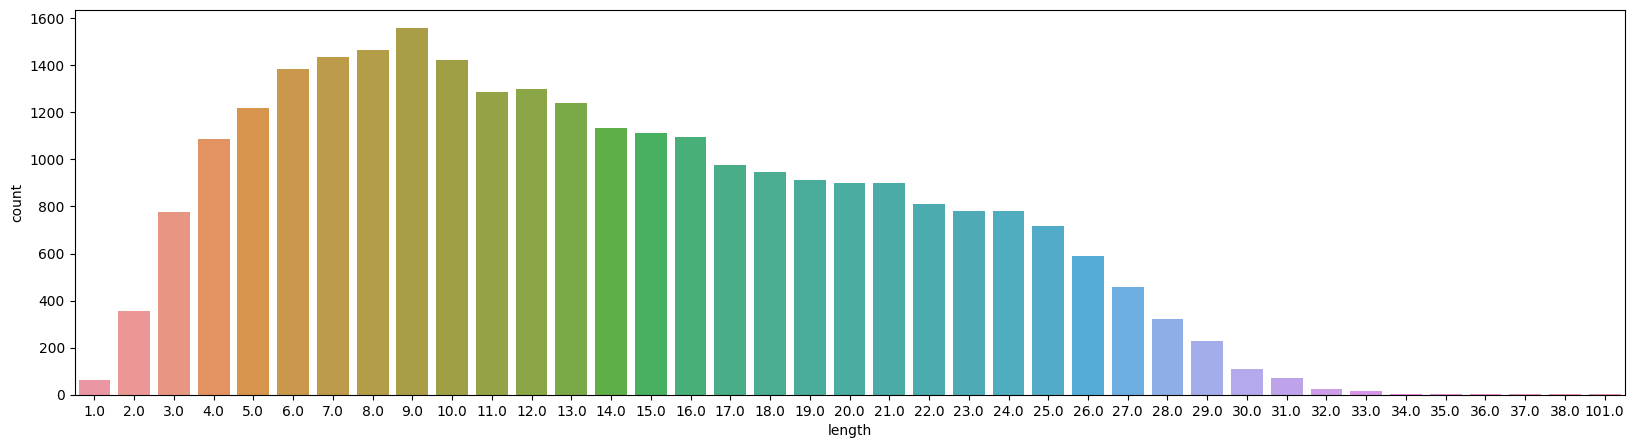

In [220]:
figure =plt.subplots(figsize=(20,5))
sns.countplot(data=df,x=df['length'])
plt.show()

In [221]:
df['sentiment'] = df['sentiment'].replace({'neutral':1,'negative':2,'positive':3})

1 - Neutral
2 - Negative
3 - Positive

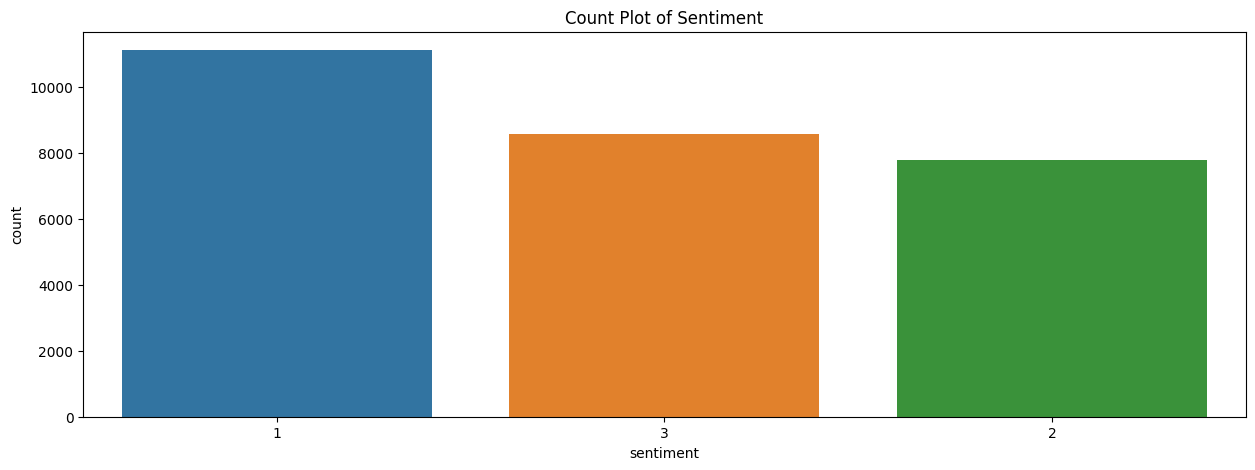

In [222]:
figure = plt.subplots(figsize=(15,5))
sns.countplot(data =df ,x = df['sentiment'],order=df['sentiment'].value_counts().index)
plt.title("Count Plot of Sentiment")
plt.show()

Data Preprocessing

removing stop words

removing punctuations

Lemmatizing

removing tags

removing special characters

lowercase conversion

In [223]:
stopwords_remove = list(stopwords.words('english'))
stemmer = LancasterStemmer()

corpus= df['text']
print(len(corpus))
print(corpus[0])

27481
 I`d have responded, if I were going


In [224]:
final_corpus = []
final_corpus_joined = []
for i in range(len(corpus)):

    text = re.sub('[^a-zA-Z]', ' ', str(corpus[i]))
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stopwords_remove] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [225]:
final_corpus_joined

['responded going',
 'sooo sad miss san diego',
 'bos bullying',
 'interview leave alone',
 'son put release already bought',
 'http www dothebouncy com smf shameless plugging best ranger forum earth',
 'feeding baby fun smile coo',
 'soooo high',
 '',
 'journey wow u became cooler hehe possible',
 'much love hopeful reckon chance minimal p never gonna get cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight lost voice',
 'test test lg env',
 'uh oh sunburned',
 'ok trying plot alternative speak sigh',
 'sick past day thus hair look wierd didnt hat would look http tinyurl com mnf kw',
 'back home gonna miss every one',
 'he',
 'oh marly sorry hope find soon',
 'playing ghost online really interesting new update kirin pet metamorph third job wait dragon pet',
 'cleaning house family comming later today',
 'gotta restart computer thought win supposed put end constant rebootiness',
 'see wat mean bout foll w friid

In [226]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [227]:
data_cleaned

,text,sentiment
0,responded going,1
1,sooo sad miss san diego,2
2,bos bullying,2
3,interview leave alone,2
4,son put release already bought,2
...,...,...
27476,wish could come see u denver husband lost job ...,2
27477,wondered rake client made clear net force devs...,2
27478,yay good enjoy break probably need hectic week...,3
27479,worth,3


In [228]:
# Storing positive data seperately
positive = data_cleaned[data_cleaned['sentiment'] == 3]
positive_list = positive['text']

# Storing negative data seperately

negative = data_cleaned[data_cleaned['sentiment'] == 2]
negative_list = negative['text']

In [233]:
positive_all = "".join([word for sent in positive_list for word in sent ])
negative_all = "".join([word for sent in negative_list for word in sent ])

In [234]:
positive_all

'feeding baby fun smile coojourney wow u became cooler hehe possiblereally really like song love story taylor swiftplaying ghost online really interesting new update kirin pet metamorph third job wait dragon petfree fillin app ipod fun im addictedjuss came backk berkeleyy omg madd fun havent minute whassqooddgoing home seen new twitter design quite heavenlyhope unni make audition fighting dahye unnifunny cute kidlittle happy wine jeje ok sm free time care jaja love dayim avid fan magazine love magazinelove available pm dear would love help convert vidsromance zero funnybetter way spoil mum let kick back relax nice meal bottle favorite wine wine redawesome worked good friendchilliinceltic lakers rematch sound better think lolthank yyyyyyyyyoooooooooouuuuulucky kid wanna see loserville pity im ozhappy star war day everyone enjoy holiday ukwell im working quite ready post publicly still beta testing cool new script codedsweeeeet san fran awesome lovehappy mother day mumsaw none baddie bes

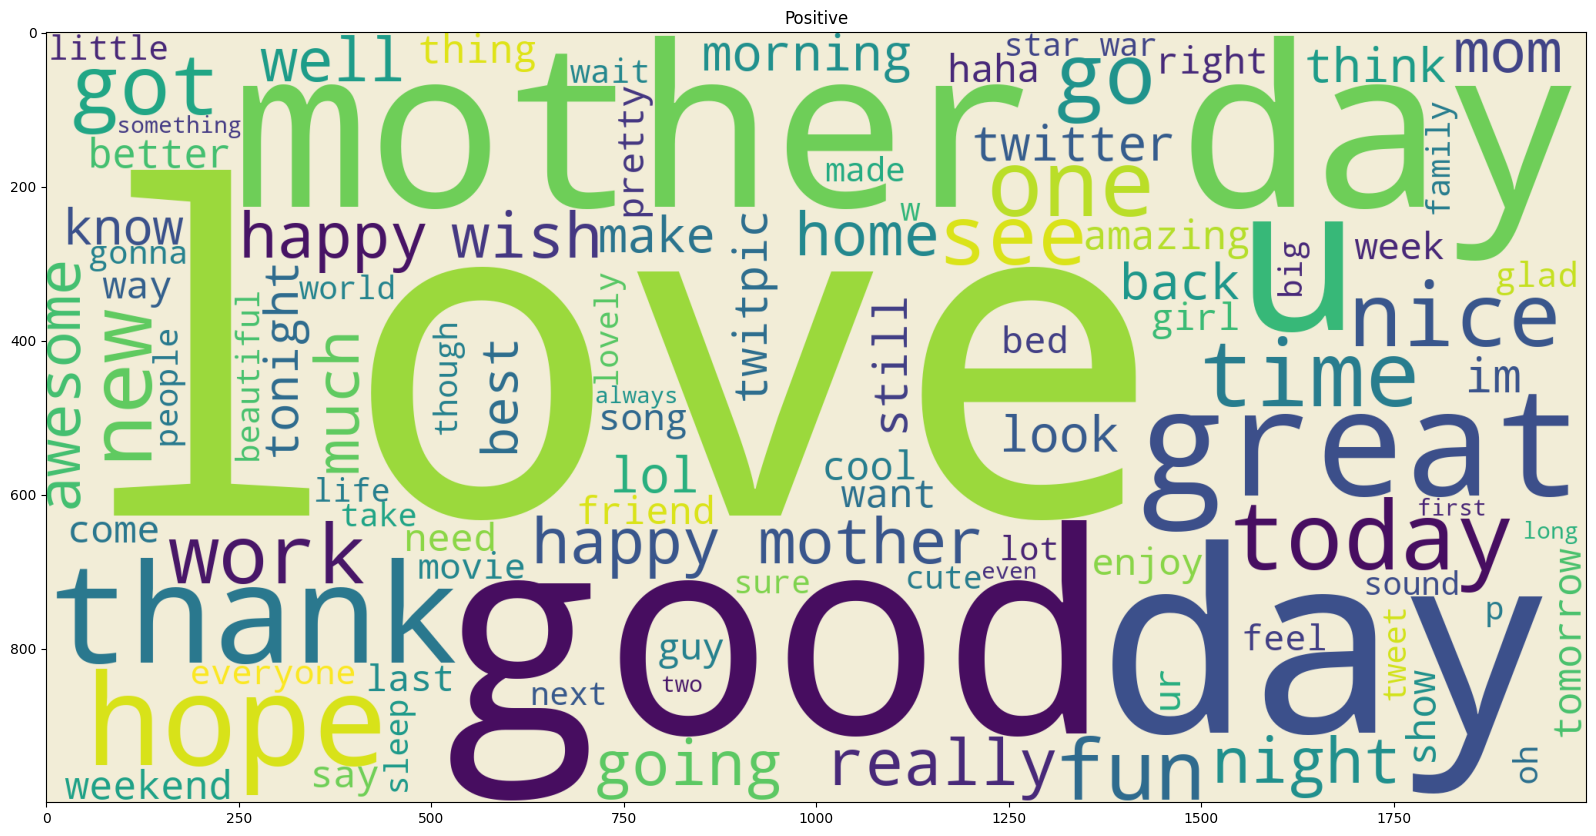

In [235]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

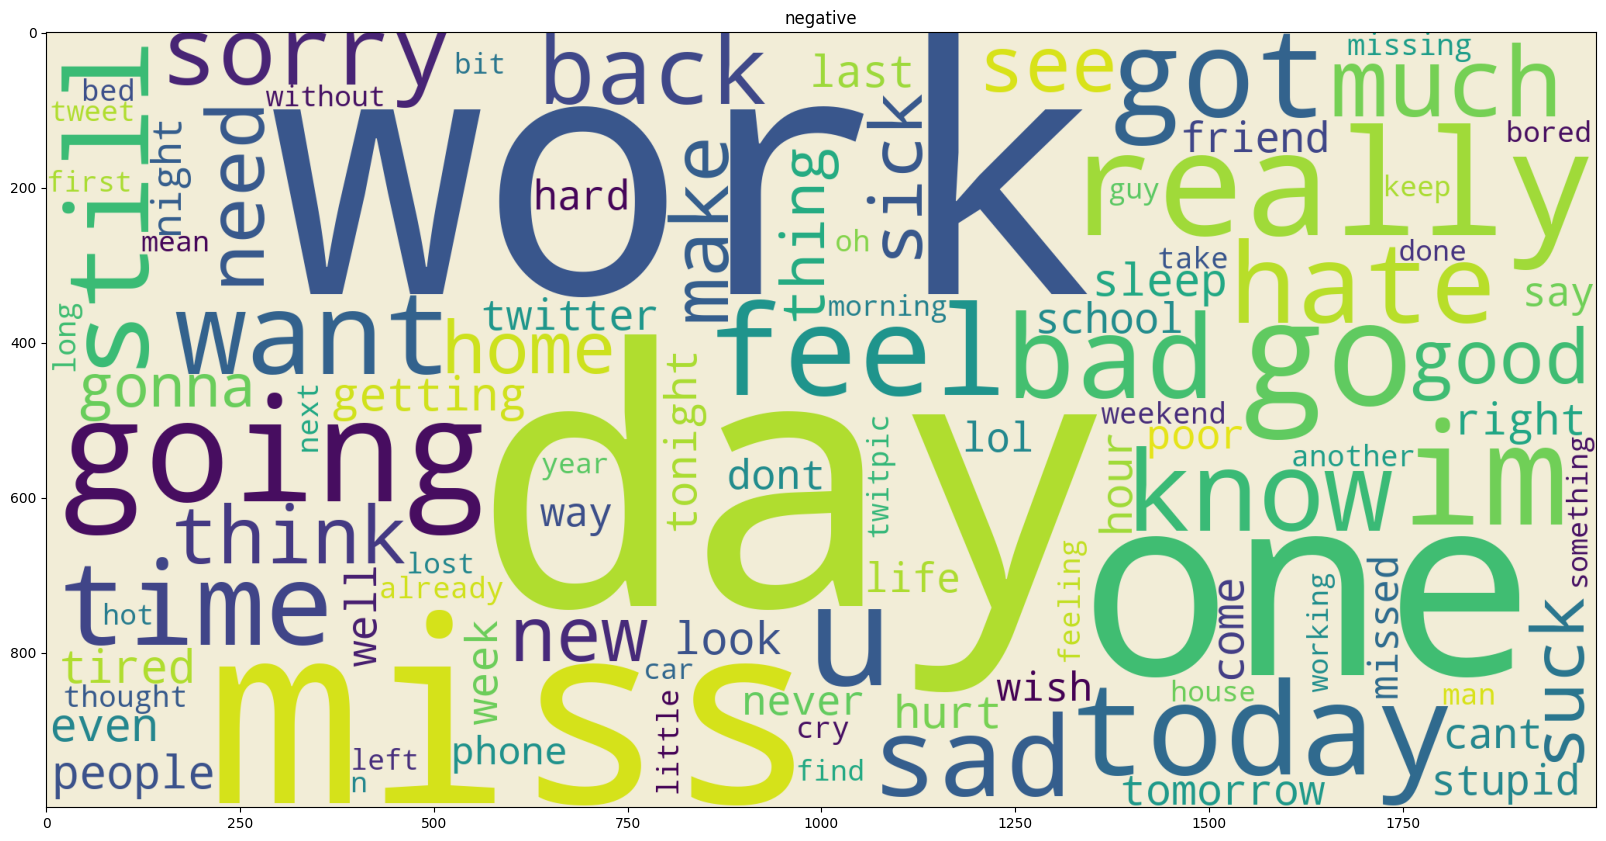

In [236]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

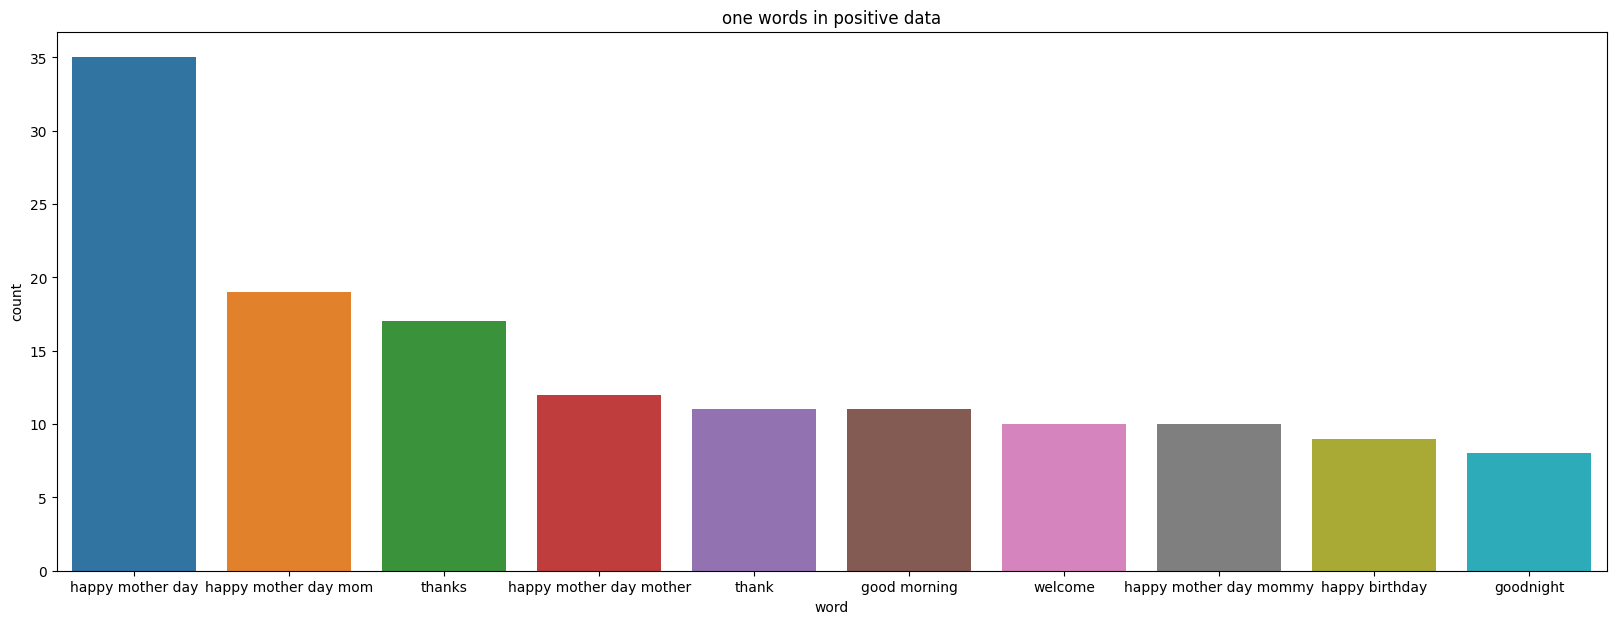

In [251]:
def get_count(data):
    dic = {}
    for i in data:
        if i not in dic:
            dic[i]=1
        else:
            dic[i]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)
plt.figure(figsize = (20,7))
sns.barplot(x = count_corpus["word"][:10], y = count_corpus["count"][:10])
plt.title('one words in positive data')
plt.show()

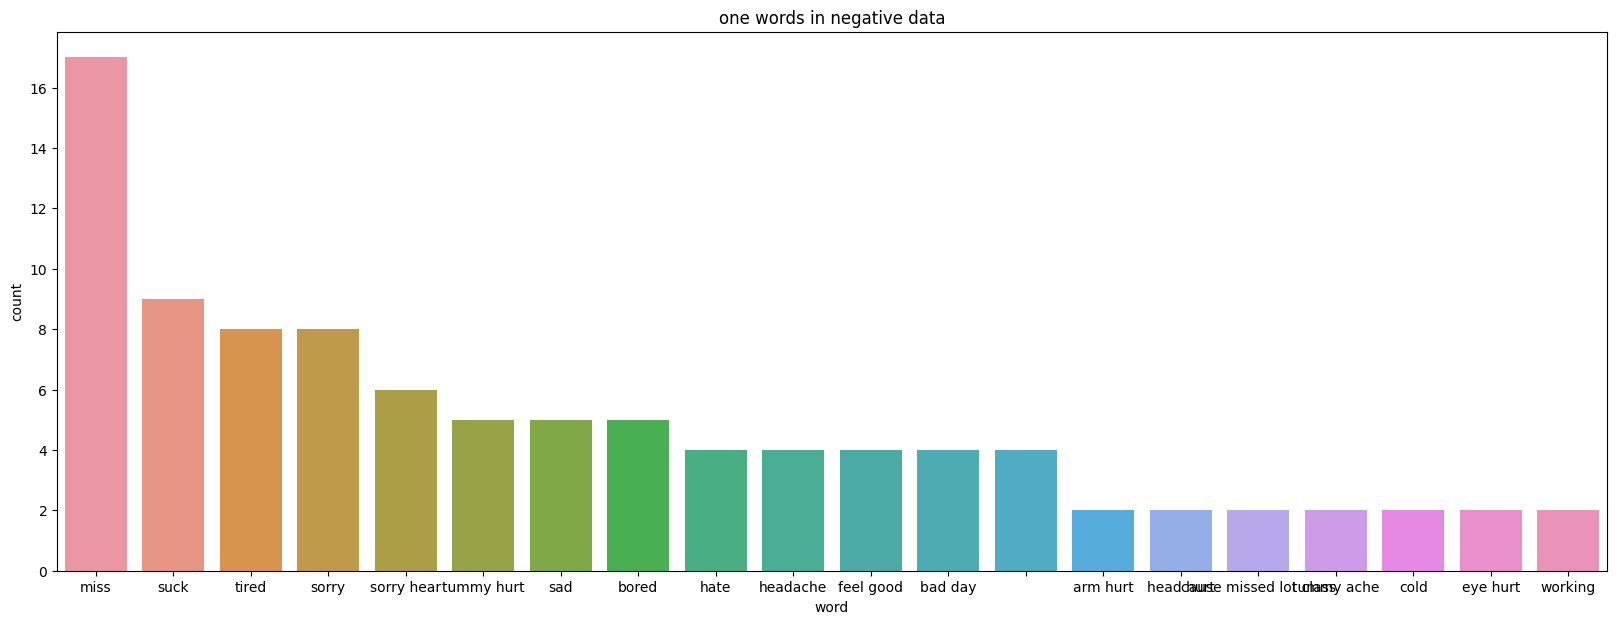

In [252]:
def get_count(data):
    dic = {}
    for i in data:
        if i not in dic:
            dic[i]=1
        else:
            dic[i]+=1    
            
    return(dic)
count_corpus = get_count(negative_list)
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)
plt.figure(figsize = (20,7))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [264]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [265]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

training accuracy =  79.0
              precision    recall  f1-score   support

           1       0.69      0.94      0.79      7449
           2       0.94      0.61      0.74      5213
           3       0.90      0.76      0.82      5750

    accuracy                           0.79     18412
   macro avg       0.84      0.77      0.78     18412
weighted avg       0.82      0.79      0.79     18412



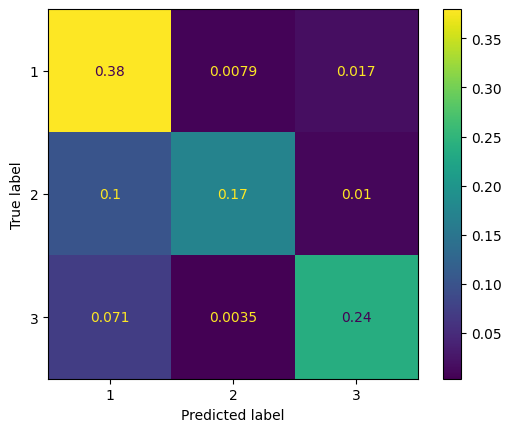

testing accuracy =  62.0
              precision    recall  f1-score   support

           1       0.53      0.81      0.64      3669
           2       0.77      0.41      0.53      2568
           3       0.75      0.55      0.64      2832

    accuracy                           0.62      9069
   macro avg       0.68      0.59      0.60      9069
weighted avg       0.67      0.62      0.61      9069



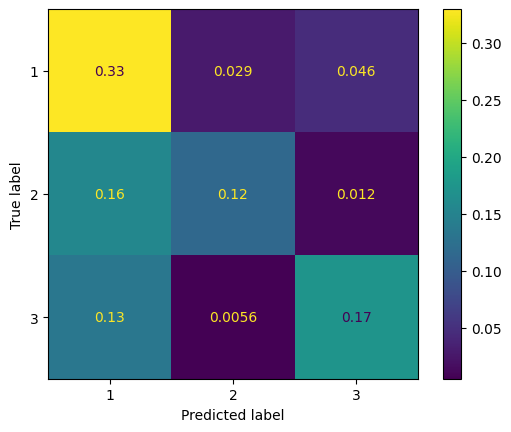

In [266]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

training accuracy =  93.0
              precision    recall  f1-score   support

           1       0.93      0.92      0.92      7449
           2       0.93      0.92      0.92      5213
           3       0.93      0.95      0.94      5750

    accuracy                           0.93     18412
   macro avg       0.93      0.93      0.93     18412
weighted avg       0.93      0.93      0.93     18412



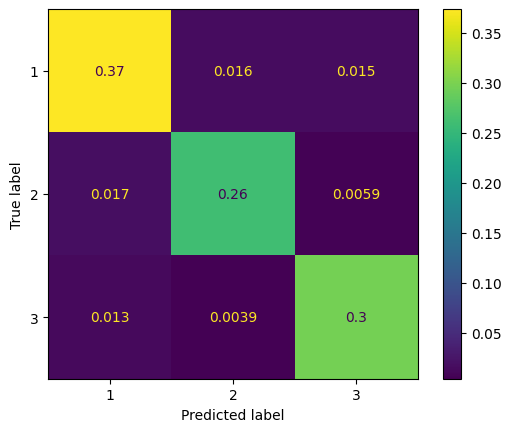

testing accuracy =  67.0
              precision    recall  f1-score   support

           1       0.62      0.69      0.65      3669
           2       0.69      0.62      0.65      2568
           3       0.73      0.69      0.71      2832

    accuracy                           0.67      9069
   macro avg       0.68      0.67      0.67      9069
weighted avg       0.67      0.67      0.67      9069



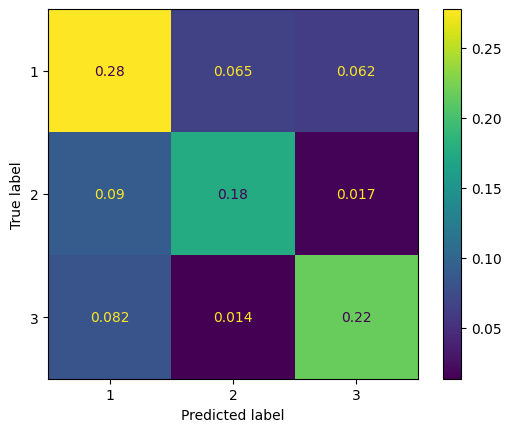

In [267]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

training accuracy =  82.0
              precision    recall  f1-score   support

           1       0.77      0.88      0.82      7449
           2       0.87      0.75      0.81      5213
           3       0.88      0.82      0.84      5750

    accuracy                           0.82     18412
   macro avg       0.84      0.82      0.82     18412
weighted avg       0.83      0.82      0.82     18412



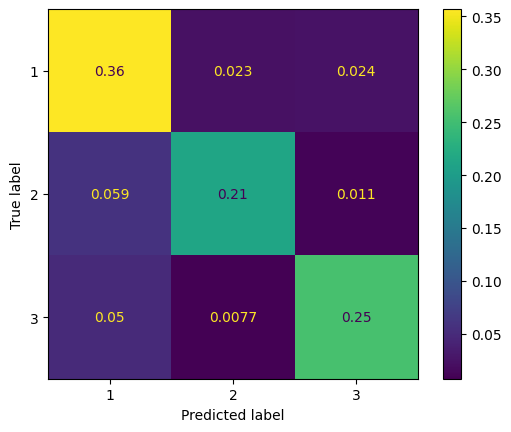

testing accuracy =  69.0
              precision    recall  f1-score   support

           1       0.61      0.77      0.68      3669
           2       0.74      0.58      0.65      2568
           3       0.78      0.67      0.72      2832

    accuracy                           0.69      9069
   macro avg       0.71      0.67      0.69      9069
weighted avg       0.70      0.69      0.69      9069



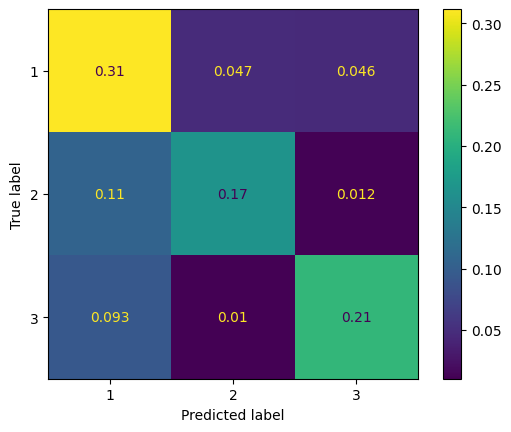

In [268]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)